<a href="https://colab.research.google.com/github/prateekrao/Breast-Cancer-Detection/blob/main/Explore-87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip "/content/drive/MyDrive/split-data.zip"

In [20]:
import tensorflow as tf
import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization, Flatten, GlobalAveragePooling2D
from keras.applications import ResNet50, DenseNet169, DenseNet121
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l1, l2, l1_l2
import matplotlib.pyplot as plt

In [4]:
gen = ImageDataGenerator(
    rescale = 1/255,
    samplewise_center = True,
    samplewise_std_normalization = True
)

In [8]:
train_set = gen.flow_from_directory(
    "/content/split-data/train/",
    target_size = (128,128),
    class_mode = 'sparse',
    shuffle = True,
    seed = 865,
    color_mode = 'rgb'
)

Found 194266 images belonging to 2 classes.


In [9]:
test_set = gen.flow_from_directory(
    "/content/split-data/test/",
    target_size = (128,128),
    class_mode = 'sparse',
    shuffle = False,
    color_mode = 'rgb'
)

Found 41629 images belonging to 2 classes.


In [10]:
valid_set = gen.flow_from_directory(
    "/content/split-data/valid/",
    target_size = (128,128),
    class_mode = 'sparse',
    shuffle = True,
    color_mode = 'rgb'
)

Found 41629 images belonging to 2 classes.


In [21]:
densenet = DenseNet121(include_top=False, weights = 'imagenet', input_shape = (128,128,3))

29089792/29084464 [==============================] - 0s 0us/step


In [22]:
for layer in densenet.layers:
  layer.trainable = False

In [23]:
model = tf.keras.Sequential()

model.add(densenet)
model.add(GlobalAveragePooling2D())

model.add(Dense(512, activation='relu', kernel_regularizer=l1(0.000001)))
model.add(Dropout(0.5))
model.add(Dense(512, activation= 'relu', kernel_regularizer=l2(0.0000001)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_regularizer=l1_l2(0.00001)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_regularizer=l1_l2(0.000001)))
model.add(Dense(2, activation='softmax'))

In [24]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 4, 4, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)              

In [25]:
opt = Adam(lr = 1e-05)

model.compile(optimizer=opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [26]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("/content/drive/MyDrive/densenet.h5")
checkpoint

In [27]:
history = model.fit(train_set, validation_data=valid_set, batch_size = 128, epochs = 20, shuffle = True)

Epoch 1/20
6071/6071 [==============================] - 303s 49ms/step - loss: 8.9608 - accuracy: 0.7447 - val_loss: 4.1811 - val_accuracy: 0.8437
Epoch 2/20
6071/6071 [==============================] - 296s 49ms/step - loss: 3.3169 - accuracy: 0.8398 - val_loss: 1.4810 - val_accuracy: 0.8527
Epoch 3/20
6071/6071 [==============================] - 296s 49ms/step - loss: 1.2197 - accuracy: 0.8491 - val_loss: 0.6693 - val_accuracy: 0.8567
Epoch 4/20
6071/6071 [==============================] - 295s 49ms/step - loss: 0.6070 - accuracy: 0.8530 - val_loss: 0.4450 - val_accuracy: 0.8599
Epoch 5/20
6071/6071 [==============================] - 298s 49ms/step - loss: 0.4328 - accuracy: 0.8582 - val_loss: 0.3782 - val_accuracy: 0.8616
Epoch 6/20
6071/6071 [==============================] - 295s 49ms/step - loss: 0.3811 - accuracy: 0.8583 - val_loss: 0.3519 - val_accuracy: 0.8633
Epoch 7/20
6071/6071 [==============================] - 295s 49ms/step - loss: 0.3572 - accuracy: 0.8610 - val_loss: 0

In [28]:
model.save("/content/drive/MyDrive/last_epoch.h5")

In [29]:
model.save_weights("/content/drive/MyDrive/last_epoch.h5")

In [30]:
model.evaluate(test_set)

1301/1301 [==============================] - 67s 51ms/step - loss: 0.3125 - accuracy: 0.8739


[0.3124794065952301, 0.8739100098609924]

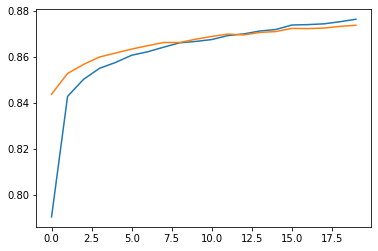

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

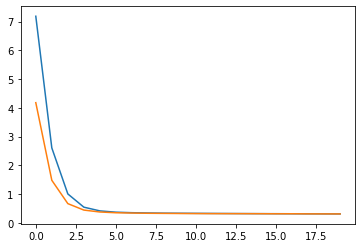

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()